In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)


1.15.0


In [0]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


4423680/4422102 [==============================] - 0s 0us/step


In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [0]:
train_images.shape


(60000, 28, 28)

In [0]:
len(train_labels)


60000

In [0]:
train_labels


array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [0]:
test_images.shape


(10000, 28, 28)

In [0]:
len(test_labels)


10000

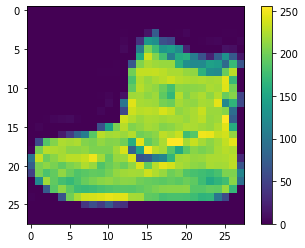

In [0]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()


In [0]:
train_images = train_images / 255.0

test_images = test_images / 255.0


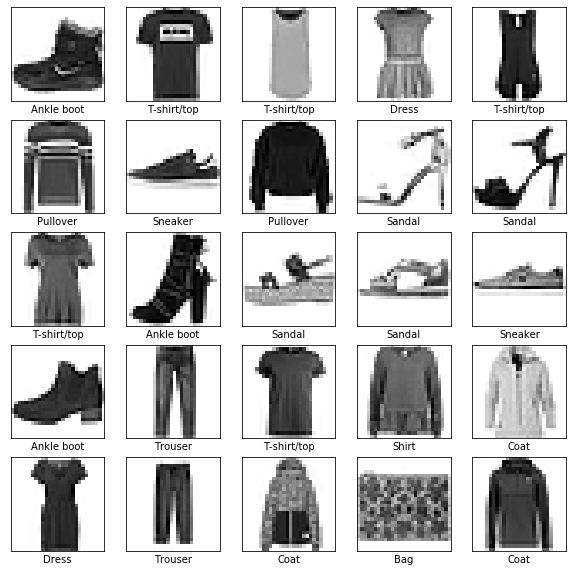

In [0]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [0]:
model.fit(train_images, train_labels, epochs=10)


Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 100us/sample - loss: 0.4973 - acc: 0.8245
Epoch 2/10
60000/60000 [==============================] - 5s 86us/sample - loss: 0.3757 - acc: 0.8636
Epoch 3/10
60000/60000 [==============================] - 5s 84us/sample - loss: 0.3366 - acc: 0.8771
Epoch 4/10
60000/60000 [==============================] - 5s 86us/sample - loss: 0.3137 - acc: 0.8845
Epoch 5/10
60000/60000 [==============================] - 5s 85us/sample - loss: 0.2938 - acc: 0.8915
Epoch 6/10
60000/60000 [==============================] - 5s 84us/sample - loss: 0.2808 - acc: 0.8957
Epoch 7/10
60000/60000 [==============================] - 5s 87us/sample - loss: 0.2696 - acc: 0.9001
Epoch 8/10
60000/60000 [==============================] - 5s 85us/sample - loss: 0.2563 - acc: 0.9043
Epoch 9/10
60000/60000 [==============================] - 5s 85us/sample - loss: 0.2478 - acc: 0.9075
Epoch 10/10
60000/60000 [==============================] -

In [0]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
 g
print('\nTest accuracy:', test_acc)


10000/10000 - 1s - loss: 0.3347 - acc: 0.8830

Test accuracy: 0.883


In [0]:
predictions = model.predict(test_images)
np.argmax(predictions[0])


9

In [0]:
test_labels[0]


9

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


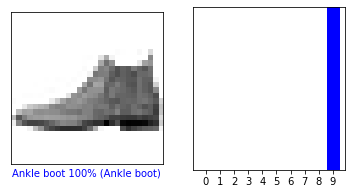

In [0]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()


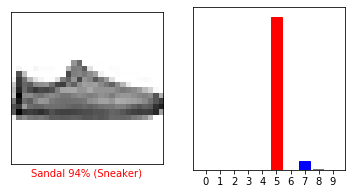

In [0]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()


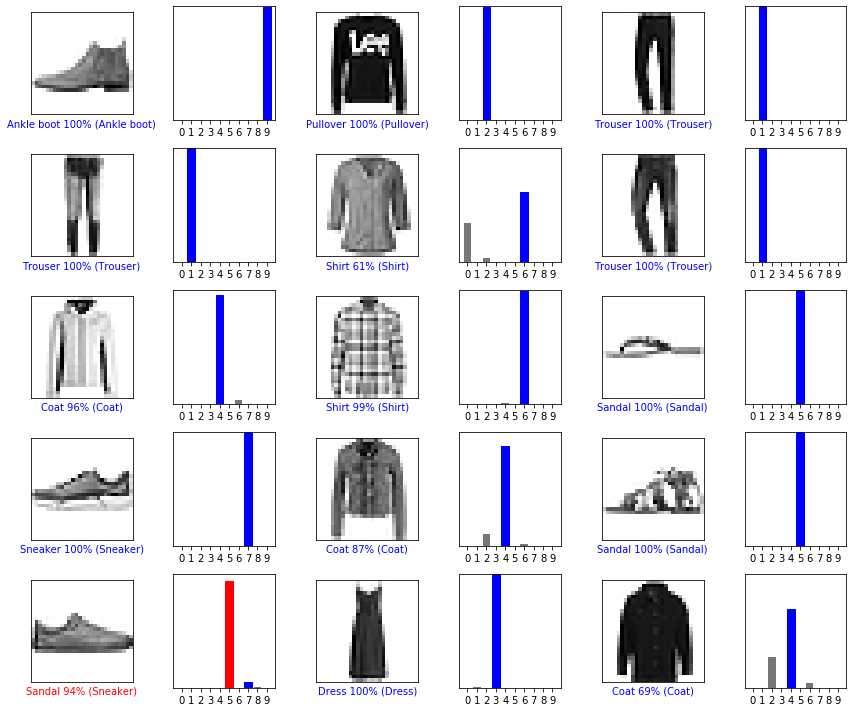

In [0]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()


In [0]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)


(28, 28)


In [0]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)


(1, 28, 28)


In [0]:
predictions_single = model.predict(img)

print(predictions_single)


[[2.2220553e-05 1.7453004e-11 9.9858367e-01 1.3882578e-09 8.8298612e-04
  6.7272442e-12 5.1113410e-04 1.7407538e-13 1.1829695e-11 4.5862168e-12]]


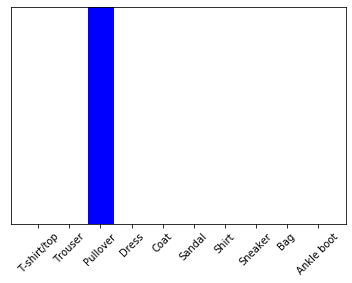

In [0]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)


In [0]:
np.argmax(predictions_single[0])


2

plot 2 singles tan(x) and sine(x) using the libraries we have used,
1-plot them on the same graph
2-plot them on seperate graphs
